# I. Import **Libraries**,  **Data** & **Functions**

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import shap

/opt/anaconda3/envs/smm750_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **Data**

In [2]:
# Load the data from previous closure
df = pd.read_csv('employee_attrition_previous_closure.csv')
pd.set_option('display.max_columns', None)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,50.0,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,No,36.0,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,Yes,21.0,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,No,50.0,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,No,52.0,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [3]:
# Load the data from Lyon 
df_lyon = pd.read_csv('employee_attrition_lyon.csv')
df_lyon

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,Y,No,14,3,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Y,Yes,13,3,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Y,Yes,13,3,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4


## **Severance Package Calculation**

In [4]:
# Compute base severance compensation based on rule
def calculate_base_severance(row):
    if row["YearsAtCompany"] < 10:
        return (1/4) * row["MonthlyIncome"] * row["YearsAtCompany"]
    else:
        return (1/4) * row["MonthlyIncome"] * 10 + (1/3) * row["MonthlyIncome"] * (row["YearsAtCompany"] - 10)

# II. Data **Exploration**

## 1. Class imbalance

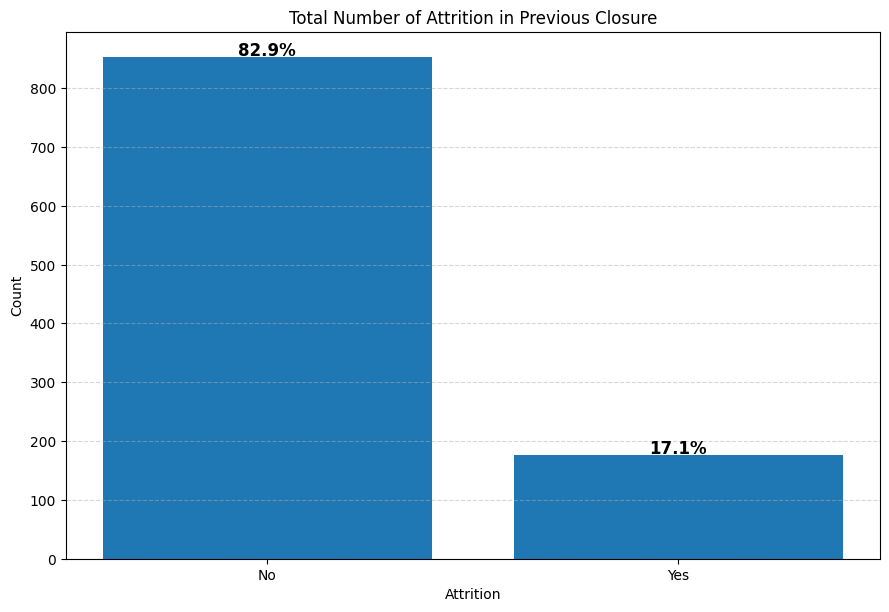

Class counts for 'Attrition':
 Attrition
No     853
Yes    176
Name: count, dtype: int64

Class proportions for 'Attrition':
 Attrition
No     0.82896
Yes    0.17104
Name: proportion, dtype: float64


In [5]:
# Count occurrences of attrition "yes" and "no"
counts = df['Attrition'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(1)

# Plot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Attrition', data=df, color='steelblue')

# Annotate percentages on bars
for i, count in enumerate(counts):
    percent = percentages.iloc[i]
    ax.text(i, count + 3, f'{percent}%', ha='center', fontsize=12, fontweight='bold')

# Labels and styling
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.bar(counts.index, counts.values)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Total Number of Attrition in Previous Closure')
plt.show()

# Class Imbalance
print("Class counts for 'Attrition':\n", df['Attrition'].value_counts())
print("\nClass proportions for 'Attrition':\n", df['Attrition'].value_counts(normalize=True))

## 2. Missing values

In [6]:
df.isnull().sum()

Attrition                     0
Age                         136
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

## 3. Dropping redundant columns

In [7]:
if df['EmployeeCount'].nunique() == 1:
    print("EmployeeCount in Previous Closure contains only one unique value.")
else:
    print("EmployeeCount in Previous Closure contains more than one unique value.")

if df_lyon['EmployeeCount'].nunique() == 1:
    print("EmployeeCount in Lyon contains only one unique value.")
else:
    print("EmployeeCount in Lyon contains more than one unique value.")

EmployeeCount in Previous Closure contains only one unique value.
EmployeeCount in Lyon contains only one unique value.


In [8]:
if df['Over18'].nunique() == 1:
    print("Over18 in Previous Closure contains only one unique value.")
else:
    print("Over18 in Previous Closure contains more than one unique value.")

if df_lyon['Over18'].nunique() == 1:
    print("Over18 in Lyon contains only one unique value.")
else:
    print("Over18 in Lyon contains more than one unique value.")

Over18 in Previous Closure contains only one unique value.
Over18 in Lyon contains only one unique value.


In [9]:
if df['StandardHours'].nunique() == 1:
    print("StandardHours in Previous Closure contains only one unique value.")
else:
    print("StandardHours in Previous Closure contains more than one unique value.")

if df_lyon['StandardHours'].nunique() == 1:
    print("StandardHours in Lyon contains only one unique value.")
else:
    print("StandardHours in Lyon contains more than one unique value.")

StandardHours in Previous Closure contains only one unique value.
StandardHours in Lyon contains only one unique value.


In [10]:
if df['EmployeeNumber'].is_unique:
    print("EmployeeNumber in Previous Closue is completely unique and can be safely removed.")
else:
    print("EmployeeNumber in Previous Closure contains duplicate values.")

if df_lyon['EmployeeNumber'].is_unique:
    print("EmployeeNumber in Lyon is completely unique and can be safely removed.")
else:
    print("EmployeeNumber in Lyon contains duplicate values.")

EmployeeNumber in Previous Closue is completely unique and can be safely removed.
EmployeeNumber in Lyon is completely unique and can be safely removed.


'EmployeeCount', 'Over18' and 'StandardHours' are features that only contain one value and thus was removed from the data set due to its redundancy in providing information for the model. 'EmployeeNumber' is unique values (similar to EmployeeID) and could also be removed to avoid negatively impacting model performance. 

In [11]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df_lyon.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

## 4. Feature distribution

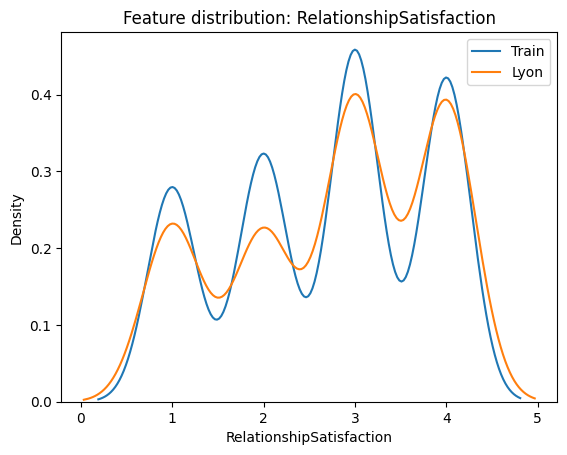

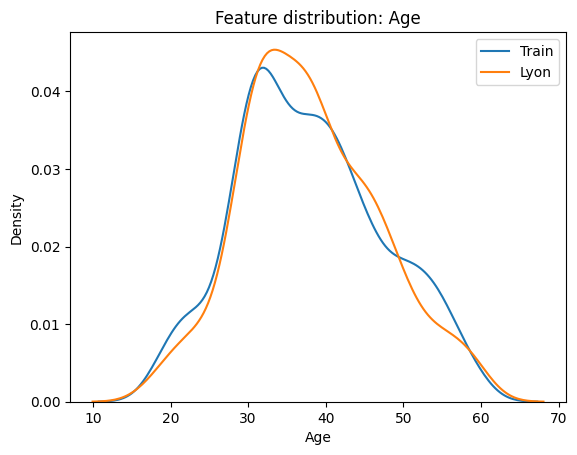

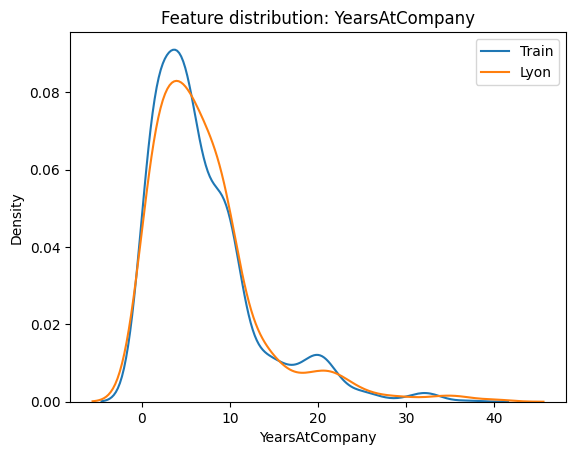

In [12]:
for col in ["RelationshipSatisfaction", "Age", "YearsAtCompany"]:
    sns.kdeplot(df[col], label="Train")
    sns.kdeplot(df_lyon[col], label="Lyon")
    plt.title(f"Feature distribution: {col}")
    plt.legend()
    plt.show()

<Figure size 800x400 with 0 Axes>

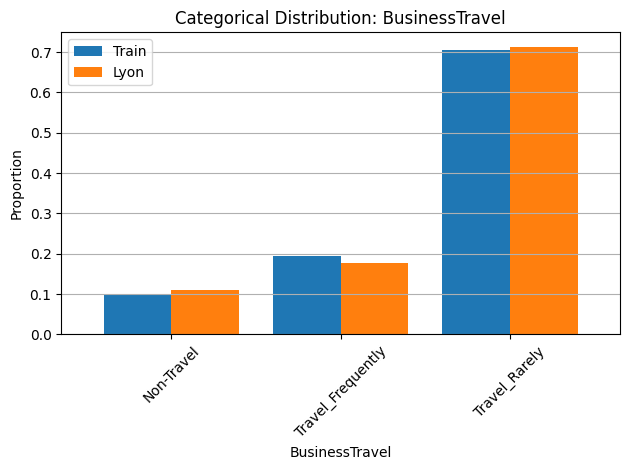

<Figure size 800x400 with 0 Axes>

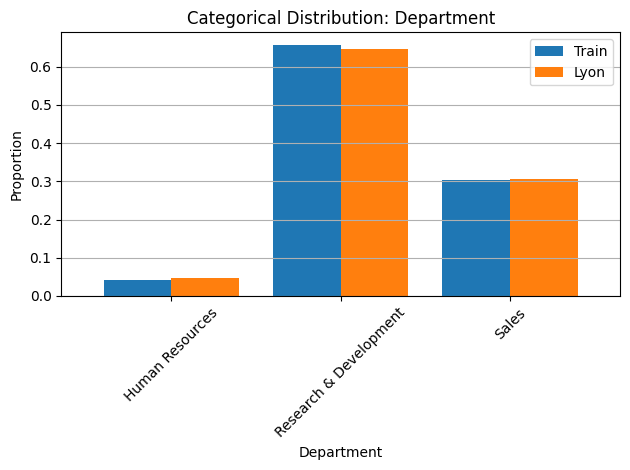

<Figure size 800x400 with 0 Axes>

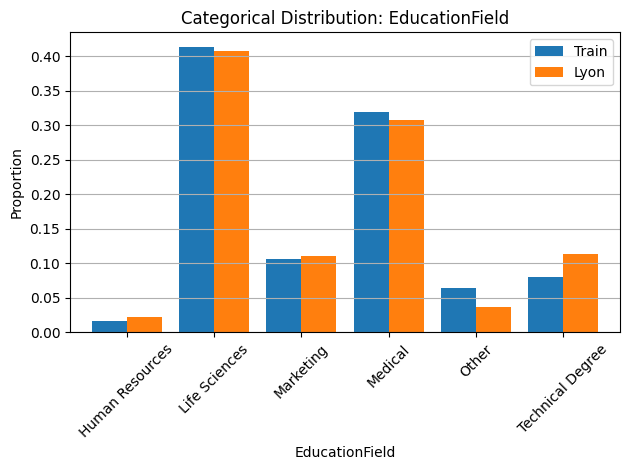

<Figure size 800x400 with 0 Axes>

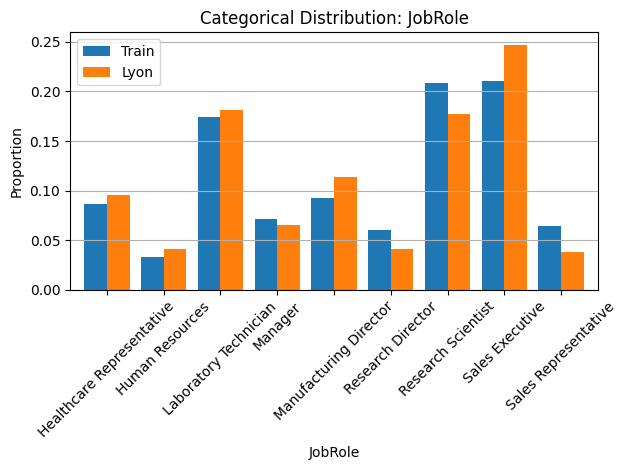

<Figure size 800x400 with 0 Axes>

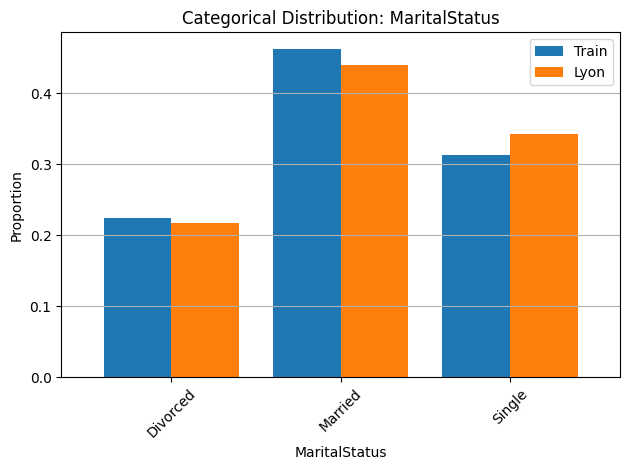

<Figure size 800x400 with 0 Axes>

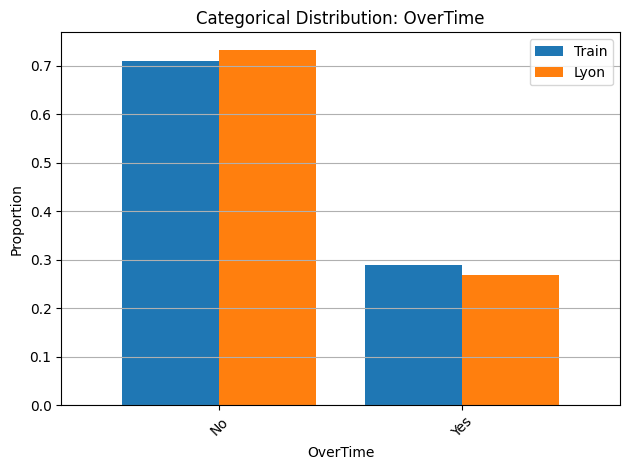

In [13]:
categorical_cols = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    # Value counts for both datasets
    train_counts = df[col].value_counts(normalize=True).sort_index()
    lyon_counts = df_lyon[col].value_counts(normalize=True).sort_index()

    # Combine into a DataFrame
    compare_df = pd.DataFrame({
        'Train': train_counts,
        'Lyon': lyon_counts
    }).fillna(0)  # fill missing categories with 0

    # Plot side-by-side bars
    compare_df.plot(kind='bar', width=0.8)
    plt.title(f"Categorical Distribution: {col}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


### In general, both data set are quite similar in terms of feature distribution and does not exhibit any strange patterns

# III. Modeling

## 1. Data **Preprocessing**
- Drop NA
- Onehot encoding categorical variables
- Train-test split
- Scaling numerical variables

In [14]:
# Drop missing values
df_temp = df.dropna()

# Prepare the data
X = df_temp.drop('Attrition', axis=1)
y = df_temp['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encode the categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Keep the original data for later
X_train_df = X_train.copy()
X_test_df = X_test.copy()
y_train_df = y_train.copy()
y_test_df = y_test.copy()


# Numerical features
train_numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
test_numerical_features = X_test.select_dtypes(include=['int64', 'float64']).columns
# Scale Numerical Features
scaler = StandardScaler()
X_train[train_numerical_features] = scaler.fit_transform(X_train[train_numerical_features])
X_test[train_numerical_features] = scaler.transform(X_test[train_numerical_features])

## 2. **Modeling**
A diverse set of base model: Logistic Regression, Random Forest, XGBoost, and SVM was used as base model to capture different perspective in the data. These are then stacked with a XGBoost as the meta-model to leverage the strengths of diverse algorithms:

- Logistic Regression captures linear relationships and provides interpretability.
- Random Forest handles non-linearities and is robust to overfitting.
- XGBoost excels at learning complex patterns and boosting weak learners.
- SVM contributes strong margin-based classification, especially in high-dimensional spaces.

Finally, XGBoost was used as the meta-model to combines these predictions effectively while maintainting a high-performing model 

### a. Logistic Regression

Best parameters (Logistic Regression): {'C': 10, 'class_weight': None, 'max_iter': 7000, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC (Logistic Regression): 0.8116319444444444
Confusion Matrix:
 [[123   5]
 [ 17  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       128
           1       0.67      0.37      0.48        27

    accuracy                           0.86       155
   macro avg       0.77      0.67      0.70       155
weighted avg       0.84      0.86      0.84       155



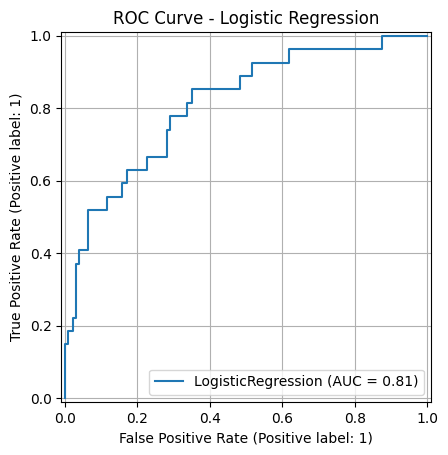

In [15]:
# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [7000],
    'class_weight': [None, 'balanced']
}

# Logistic regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Grid search for Logistic Regression
grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Fit the model
best_lr.fit(X_train, y_train)

# Predict
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

# Model evaluation
print("Best parameters (Logistic Regression):", grid_search.best_params_)
print("ROC AUC (Logistic Regression):", roc_auc_score(y_test, y_prob_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# ROC Curve
RocCurveDisplay.from_estimator(best_lr, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()  

### b. Random Forest

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
ROC AUC: 0.8414351851851851
Confusion Matrix:
 [[122   6]
 [ 13  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       128
           1       0.70      0.52      0.60        27

    accuracy                           0.88       155
   macro avg       0.80      0.74      0.76       155
weighted avg       0.87      0.88      0.87       155



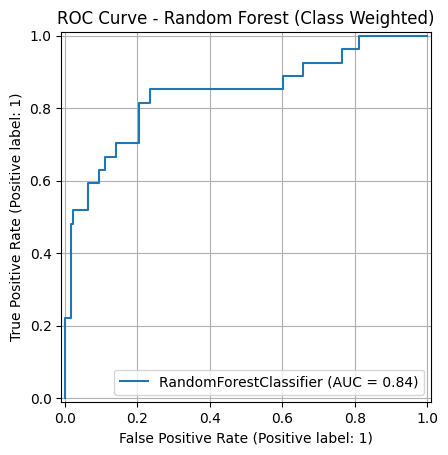

In [16]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 10]
}

# Do a grid search with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Model evaluation
print("Best parameters:", grid_search.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve - Random Forest (Class Weighted)")
plt.grid(True)
plt.show()

### c. XGBoost

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 5, 'subsample': 0.6}
ROC AUC: 0.8194444444444444
Confusion Matrix:
 [[120   8]
 [ 11  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       128
           1       0.67      0.59      0.63        27

    accuracy                           0.88       155
   macro avg       0.79      0.77      0.78       155
weighted avg       0.87      0.88      0.87       155



/opt/anaconda3/envs/smm750_env/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


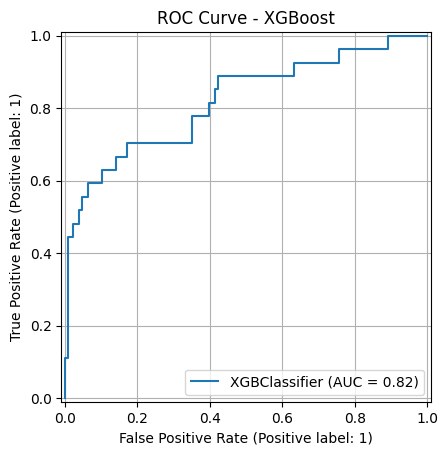

In [17]:
# Hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

# Do a grid search for XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=4.5)
grid_search = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Model evaluation
print("Best parameters:", grid_search.best_params_)
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.grid(True)
plt.show()

### d. SVM

Best parameters (SVM): {'C': 100, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
ROC AUC (SVM): 0.8110532407407407
Confusion Matrix:
 [[122   6]
 [ 14  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       128
           1       0.68      0.48      0.57        27

    accuracy                           0.87       155
   macro avg       0.79      0.72      0.74       155
weighted avg       0.86      0.87      0.86       155



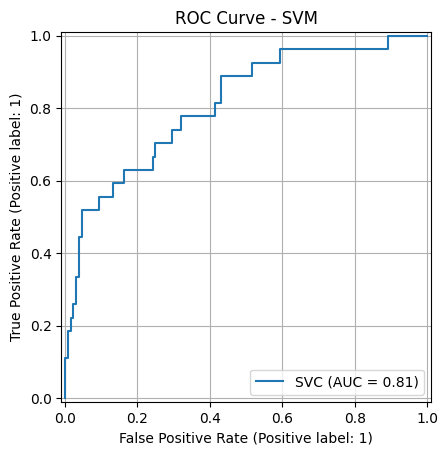

In [18]:
# Parameter grid for SVM
param_grid = {
    'C': [0.01, 1, 10, 100, 200],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# SVM model
svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)
# Evaluate the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
y_prob = best_svm.predict_proba(X_test)[:, 1]
# Model evaluation
print("Best parameters (SVM):", grid_search.best_params_)
print("ROC AUC (SVM):", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# ROC Curve
RocCurveDisplay.from_estimator(best_svm, X_test, y_test)
plt.title("ROC Curve - SVM")
plt.grid(True)
plt.show()

### e. Ensemble

ROC AUC (Stacked): 0.7971643518518519
Confusion Matrix:
 [[114  14]
 [  8  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       128
           1       0.58      0.70      0.63        27

    accuracy                           0.86       155
   macro avg       0.76      0.80      0.77       155
weighted avg       0.87      0.86      0.86       155



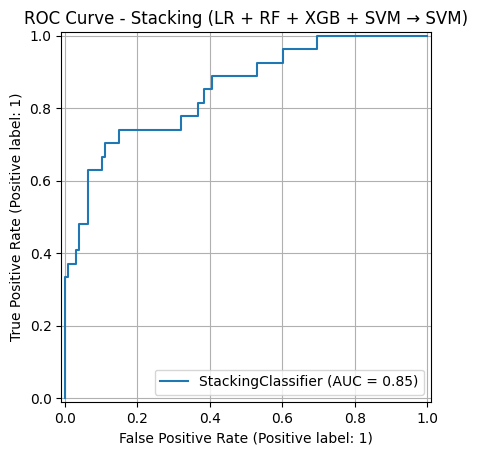

In [19]:
# Base estimators
estimators = [
    ('rf', best_rf), 
    ('xgb', best_xgb), 
    ('svm', best_svm), 
    ('lr', best_lr)
]

# Meta model 
#meta_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
#meta_model = SVC(kernel='linear', probability=True, class_weight= 'balanced' , random_state=42)
#meta_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100, max_depth=3, random_state=42),
meta_model = XGBClassifier(learning_rate = 0.05, n_estimators = 100,max_depth = 2,
                           eval_metric='logloss', reg_alpha=1, reg_lambda=5,
                           random_state=42, scale_pos_weight=5)

# Stacking
stacked_model = StackingClassifier(
    estimators= estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

#Define parameters for LR GridSearchCV
# param_grid = {
#    'final_estimator__C': [0.01, 0.1, 1, 10],
#    'final_estimator__penalty': ['l1','l2'],
#    'final_estimator__solver': ['liblinear', 'saga', 'lbfgs'],
#    'final_estimator__max_iter': [2000],
#    'final_estimator__class_weight': [None, 'balanced']
# }

# Grid search for StackingClassifier
#grid_search = GridSearchCV(stacked_model, param_grid, cv=5, n_jobs=-1, scoring='roc_auc')
#grid_search.fit(X_train, y_train)

# Get the best model
#best_stacked_model = grid_search.best_estimator_
#print("Best parameters (Stacking):", grid_search.best_params_)


# Fit the stacking model
stacked_model.fit(X_train, y_train)
y_pred_stack = stacked_model.predict(X_test)
y_prob_stack = stacked_model.predict_proba(X_test)[:, 1] #>= 0.6

print("ROC AUC (Stacked):", roc_auc_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

RocCurveDisplay.from_estimator(stacked_model, X_test, y_test)
plt.title("ROC Curve - Stacking (LR + RF + XGB + SVM → SVM)")
plt.grid(True)
plt.show()


# IV. Feature Importance

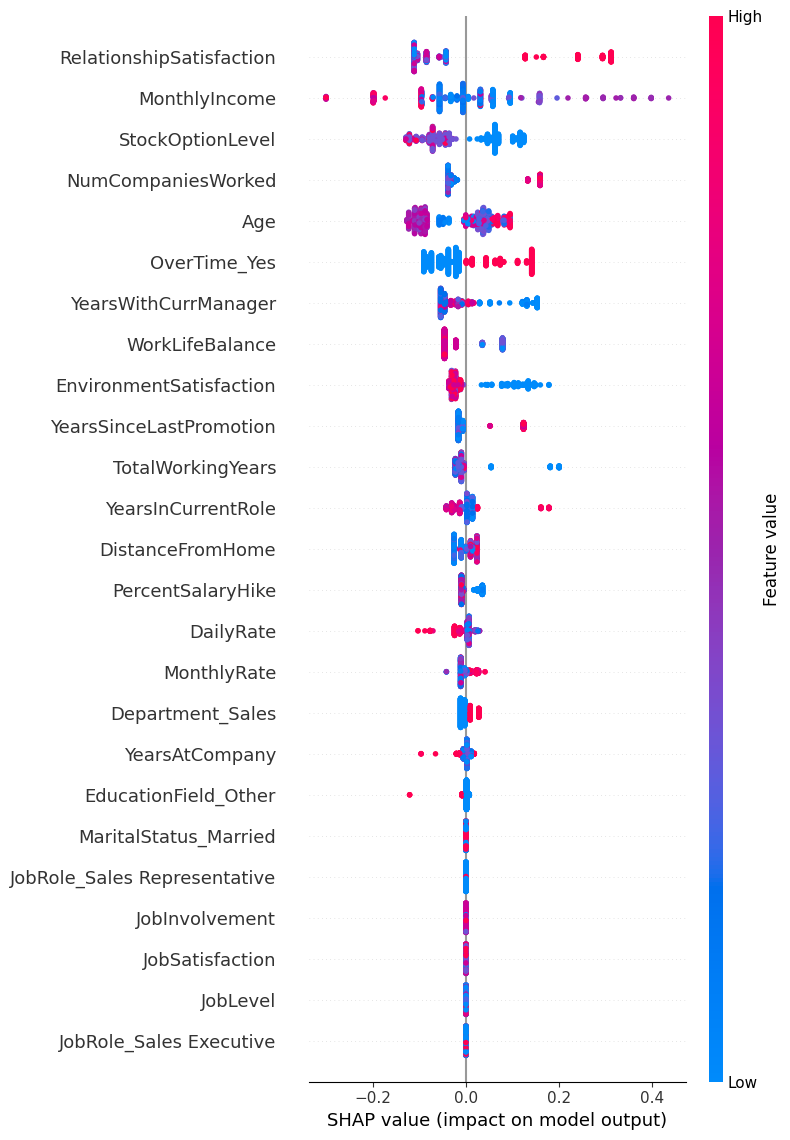

In [20]:
# Transform X_train to get meta-features from the stacking model
X_meta = stacked_model.transform(X_train)
base_model_names = list(stacked_model.named_estimators_.keys())
original_feature_names = X_train.columns.tolist()
meta_feature_names = base_model_names + original_feature_names

# Convert to DataFrame and clean it
X_meta_df = pd.DataFrame(X_meta, columns=meta_feature_names)\
              .apply(pd.to_numeric, errors='coerce')\
              .dropna()

# Convert bools to int and ensure all values are float64
X_meta_df = X_meta_df.astype({col: 'int' for col in X_meta_df.select_dtypes('bool').columns})\
                     .astype('float64')

# Run SHAP on the meta-model
explainer = shap.Explainer(stacked_model.final_estimator_, X_meta_df)
shap_values = explainer(X_meta_df)

# lice SHAP values to include only original input features
orig_idx = len(base_model_names)
X_orig_df = X_meta_df.iloc[:, orig_idx:]
shap_values_orig = shap_values[:, orig_idx:]

# 6. Plot SHAP summary (directional feature importance)
shap.summary_plot(shap_values_orig, X_orig_df, max_display=25, plot_type="dot")


Using SHAP values, we identify the most influential features impacting employee retention predictions as follows:
- Relationship Satisfaction: Employees with higher relationship satisfaction surprisingly tend to have a greater likelihood of leaving.
- Monthly Income: Employees earning higher monthly incomes exhibit a lower likelihood of leaving. Although lower income does not strongly predict turnover, it remains an important indicator influencing retention.
- Stock Option Level: Employees possessing higher levels of stock options show decreased turnover rates, likely due to increased investment and incentives aligning their interests closely with company success.
- Number of Companies Worked: Employees with experience across multiple companies are more inclined to leave, possibly reflecting tendencies toward job-hopping and reduced organizational commitment.
- Age: Employee age has a mixed correlation with retention. Generally, younger employees exhibit higher turnover rates compared to older employees. However, exceptions exist, as some older employees may also pursue new opportunities.
- OverTime: Employees frequently working overtime demonstrate higher turnover risks. Excessive overtime likely contributes to burnout and perceived underappreciation, prompting decisions to exit the company.
- Years With Current Manager: Employees who have spent more time under their current manager tend to remain with the company, reflecting positive managerial relationships. Conversely, shorter tenure under a manager often correlates with dissatisfaction and higher turnover rates.
- Environment Satisfaction: High satisfaction with the work environment significantly correlates with improved retention. Conversely, low environment satisfaction is strongly associated with increased employee departure rates due to dissatisfaction with workplace conditions.


# V. **Predictions** on Lyon Data

In [21]:
# One-hot encode Lyon data
df_lyon_encoded = pd.get_dummies(df_lyon, drop_first=True)

# Align with X_train
df_lyon_encoded = df_lyon_encoded.reindex(columns=X_train.columns, fill_value=0)

# Impute missing values after alignment
imputer = SimpleImputer(strategy='mean')
df_lyon_encoded_clean = pd.DataFrame(
    imputer.fit_transform(df_lyon_encoded),
    columns=df_lyon_encoded.columns
)

# Predict probability of attrition (class = 1)
attrition_probs = stacked_model.predict_proba(df_lyon_encoded_clean)[:, 1]

# Attach to original data
df_lyon["Attrition_Probability"] = attrition_probs

# Save the results as a CSV file (keep only the prediction column)
attrition_probs_df = df_lyon[[ 'Attrition_Probability']]
attrition_probs_df.to_csv('attrition_prediction.csv', index=False)

# Display the first few rows of the updated DataFrame
df_lyon.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,No,18,3,4,0,6,4,3,5,4,1,3,0.498720
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,No,11,3,3,2,5,3,3,4,2,1,3,0.529754
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,No,11,3,3,1,1,2,3,1,0,0,0,0.507917
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,No,17,3,3,1,25,2,3,1,0,0,0,0.507917
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,No,16,3,4,0,16,3,4,13,11,3,7,0.590528


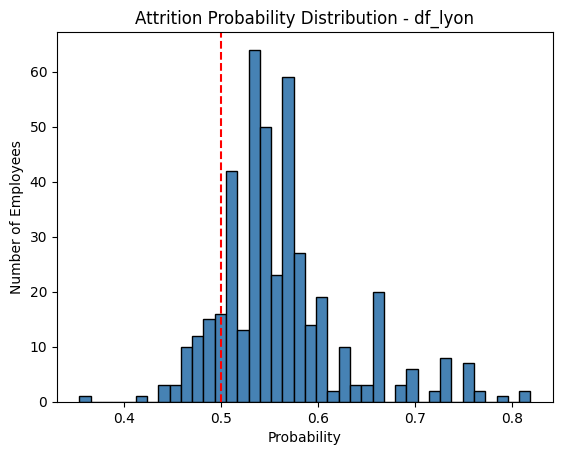

In [22]:
plt.hist(df_lyon["Attrition_Probability"], bins=40, color='steelblue', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--')
plt.title("Attrition Probability Distribution - df_lyon")
plt.xlabel("Probability")
plt.ylabel("Number of Employees")
plt.show()


### The distribution of attrition probability is well above the 0.5 threshold (the red line). This implies that the model predict more employees are likely to leave the company when offered a severance package.

# VI. Grouping employees

## 1. Data Preprocessing

In [80]:
# Dropping Age, Gender, Marital Status, Attrition Probability, and Total Working Years to avoid Discrimination when clustering
df_grouping = df_lyon.drop(columns=['Age','Gender','MaritalStatus', 'Attrition_Probability', 'TotalWorkingYears'])

# Impute DailyRate ad DistanceFromHome
imputer = SimpleImputer(strategy='mean')
df_grouping['DailyRate'] = imputer.fit_transform(df_grouping[['DailyRate']])
df_grouping['DistanceFromHome'] = imputer.fit_transform(df_grouping[['DistanceFromHome']])

# Impute BusinessTravel
imputer = SimpleImputer(strategy='most_frequent')
df_grouping['BusinessTravel'] = imputer.fit_transform(df_grouping[['BusinessTravel']]).ravel()

# Check for null values
df_grouping.isnull().sum()

BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [81]:
# One-hot encode the categorical features
df_grouping = pd.get_dummies(df_grouping, drop_first=True)

# Scale only numerical features
numerical_features = df_grouping.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_grouping[numerical_features] = scaler.fit_transform(df_grouping[numerical_features])


## 2. Find optimal number of PCA components

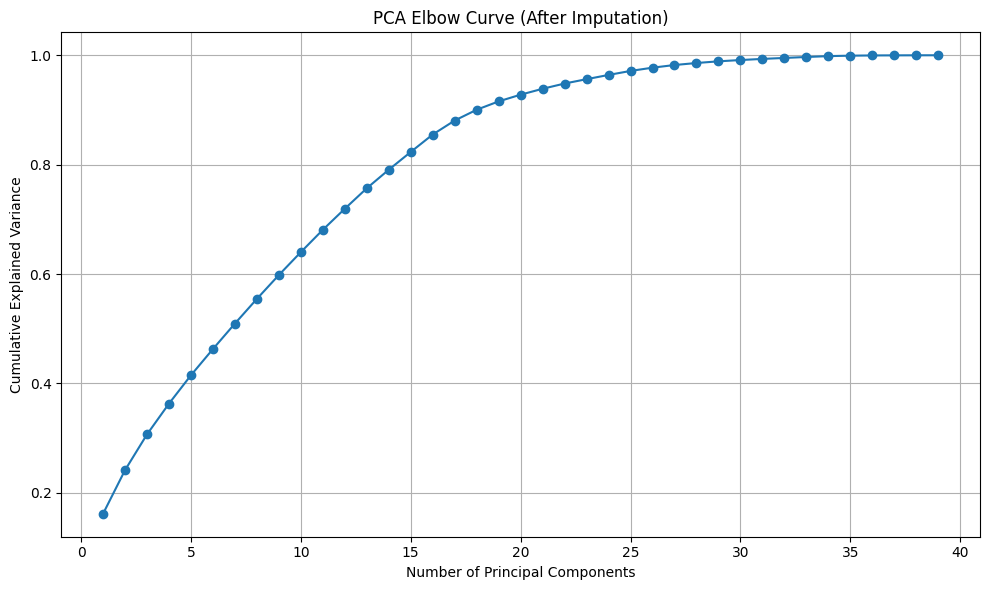

In [82]:
# Run PCA on the imputed dataset
pca = PCA()
pca.fit(df_grouping)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Curve (After Imputation)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [83]:
# Use PCA to reduce dimensionality of Lyon data
pca = PCA(n_components=20, random_state=42)

# Fit PCA on the imputed dataset
df_grouping_pca = pca.fit_transform(df_grouping)

# Transform the dataset
df_grouping_pca_df = pd.DataFrame(df_grouping_pca, 
                                  columns=[f'PC{i+1}' for i in range(df_grouping_pca.shape[1])],
                                  index=df_grouping.index)
df_grouping_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.407231,-0.004118,0.295558,-0.730775,-1.004886,0.693477,0.404693,0.289921,1.537564,-0.481835,0.863607,0.504414,-0.545366,0.005467,0.578584,-2.344745,-0.205812,-0.030854,-0.591076,0.482461
1,-0.977113,-0.978040,-0.632981,0.454779,-0.500521,0.866670,-0.212818,1.846082,0.274157,-1.038004,0.459355,2.079756,0.969973,1.078079,-0.090100,-1.087316,1.137353,0.005347,-0.601643,-0.216350
2,-2.390926,-0.981870,-1.379291,-0.480155,1.028114,-2.838115,1.589237,0.304963,1.168021,-1.634766,-0.144571,-0.700354,0.121776,0.441555,0.075428,0.259757,0.373570,0.434875,-0.164784,0.065544
3,-1.165164,-0.308839,1.444401,0.354226,-0.283438,0.481838,-0.622829,0.085616,-0.554978,-0.323529,-0.890463,0.754053,-0.558195,1.456812,-0.488498,-1.476269,1.003191,0.602605,0.549021,0.542301
4,1.220167,0.048027,-0.529674,0.272988,0.692370,2.334974,1.142095,-0.638884,1.872314,0.363404,-1.255990,0.435016,0.158379,1.285177,1.302028,1.072803,0.152528,-0.713925,0.671417,0.580782


## 3. Grouping by kmeans on PCA space

### a. Finding the optimal number of clusters

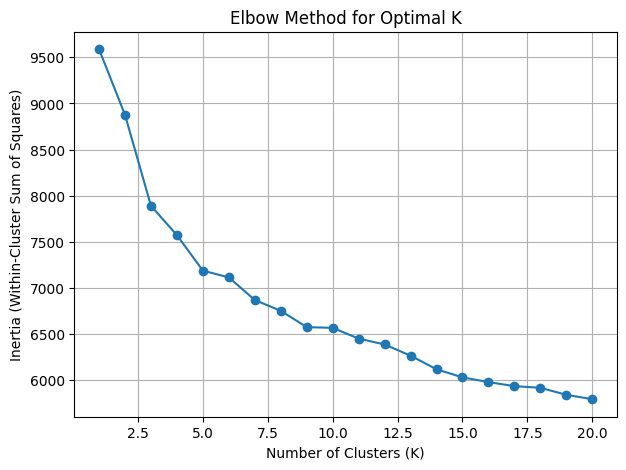

In [ ]:
inertias = []
K_range = range(1, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_grouping_pca_df)
    inertias.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

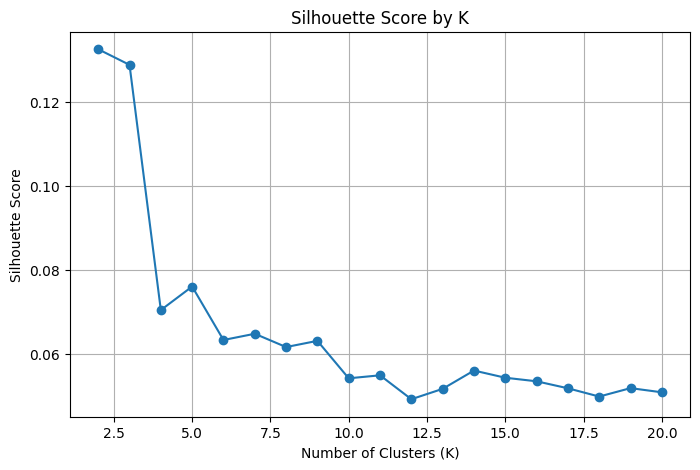

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_grouping_pca_df)
    score = silhouette_score(df_grouping_pca_df, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Score by K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


### Both the elbow method and silhouette score suggest that 5 clusters is the optimal number of clusters to use for kmeans clustering. Although at 3 clusters the metrics are the best, but this would lead to difficulty in controlling the number of employees who are actually accept the severance package.

### b. Clustering for KMeans = 5

In [ ]:
# Fit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans_clusters = kmeans.fit_predict(df_grouping_pca_df)

# Add cluster labels to a new DataFrame
df_kmeans_PCA = df_lyon.copy()
df_kmeans_PCA['Cluster'] = kmeans_clusters

df_kmeans_PCA

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Cluster
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,No,18,3,4,0,6,4,3,5,4,1,3,0.498720,4
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,No,11,3,3,2,5,3,3,4,2,1,3,0.529754,4
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,No,11,3,3,1,1,2,3,1,0,0,0,0.507917,4
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,No,17,3,3,1,25,2,3,1,0,0,0,0.507917,1
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,No,16,3,4,0,16,3,4,13,11,3,7,0.590528,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,No,14,3,1,2,5,2,3,4,3,0,3,0.477493,4
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Yes,13,3,4,1,6,0,3,5,4,1,4,0.484833,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Yes,13,3,4,0,5,4,2,3,2,2,2,0.667726,4
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,No,11,3,3,2,13,2,3,5,4,0,4,0.514733,1


### c. Discrimination check
#### Discrimination check showed that the groups are well defined with decent distribution of Age, Marital Status and Gender, making this grouping method safe for optimization.

Average Age by Cluster:
         count       mean       std   min   25%   50%    75%   max
Cluster                                                           
0         49.0  36.938776  8.612994  19.0  32.0  34.0  43.00  58.0
1        100.0  40.340000  7.838290  24.0  36.0  39.5  46.00  59.0
2         42.0  47.047619  7.032858  32.0  42.0  46.0  52.00  60.0
3         94.0  35.968085  6.031195  27.0  31.0  36.0  38.75  50.0
4        101.0  34.326733  9.584476  18.0  29.0  33.0  40.00  59.0

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
0        0.473684  0.526316
1        0.429907  0.570093
2        0.238095  0.761905
3        0.422018  0.577982
4        0.373016  0.626984

Marital Status Distribution by Cluster:
MaritalStatus  Divorced   Married    Single
Cluster                                    
0              0.192982  0.456140  0.350877
1              0.264151  0.415094  0.320755
2              0.268293  0.512195  0.219512
3              0.

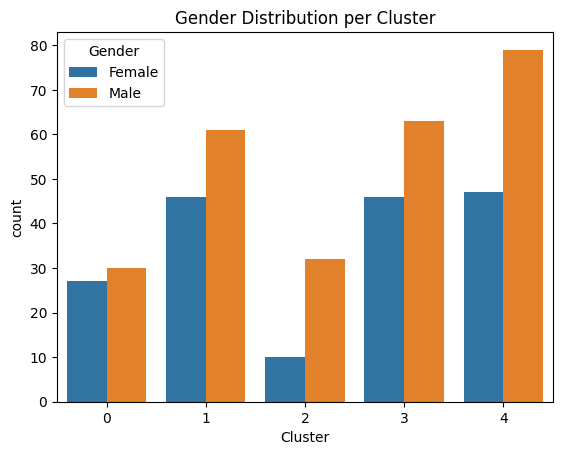

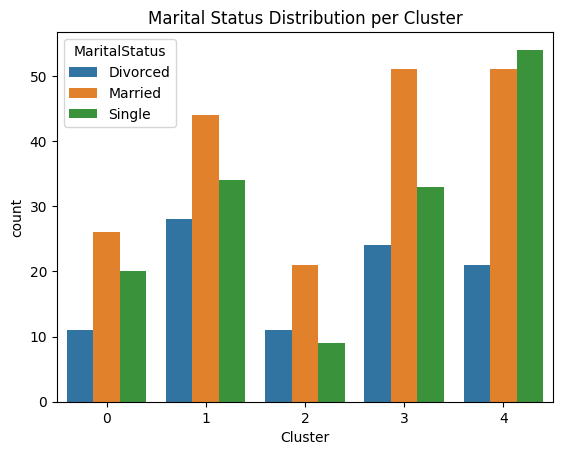

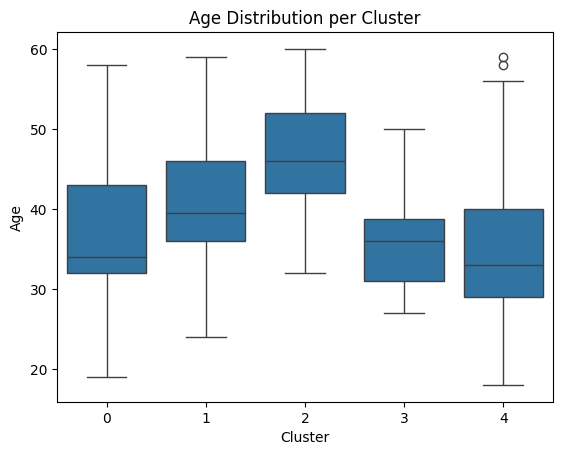

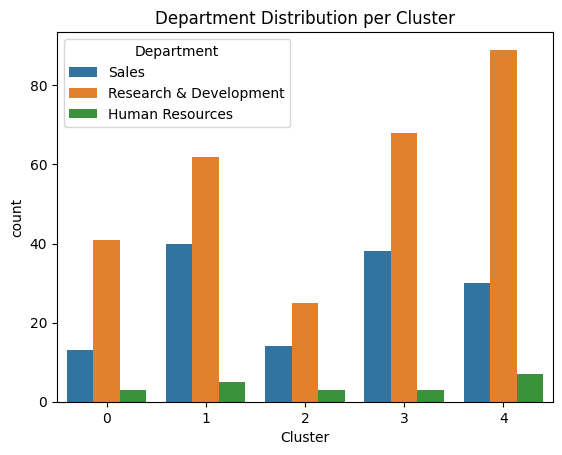

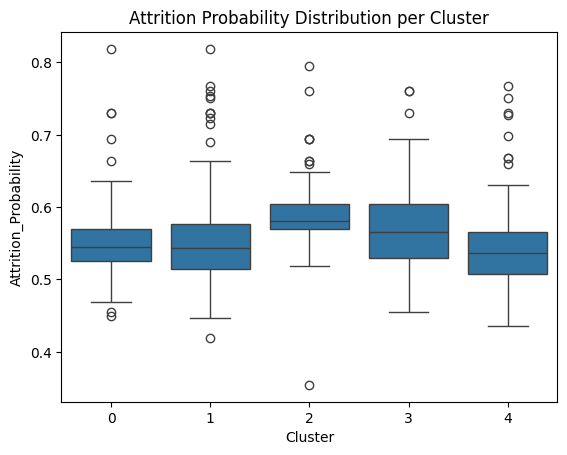

In [ ]:
# 1. Check Age Distribution (e.g., mean and distribution per cluster)
print("Average Age by Cluster:")
print(df_kmeans_PCA.groupby('Cluster')['Age'].describe())

# 2. Check Gender Distribution per Cluster
print("\nGender Distribution by Cluster:")
print(df_kmeans_PCA.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack())

# 3. Check Marital Status Distribution per Cluster
print("\nMarital Status Distribution by Cluster:")
print(df_kmeans_PCA.groupby('Cluster')['MaritalStatus'].value_counts(normalize=True).unstack())

# Gender distribution per cluster
sns.countplot(data=df_kmeans_PCA, x='Cluster', hue='Gender')
plt.title('Gender Distribution per Cluster')
plt.show()

# Marital status distribution per cluster
sns.countplot(data=df_kmeans_PCA, x='Cluster', hue='MaritalStatus')
plt.title('Marital Status Distribution per Cluster')
plt.show()

# Age boxplot
sns.boxplot(data=df_kmeans_PCA, x='Cluster', y='Age')
plt.title('Age Distribution per Cluster')
plt.show()

# Department distribution per cluster
sns.countplot(data=df_kmeans_PCA, x='Cluster', hue='Department')
plt.title('Department Distribution per Cluster')
plt.show()

# Probability boxplot
sns.boxplot(data=df_kmeans_PCA, x='Cluster', y='Attrition_Probability')
plt.title('Attrition Probability Distribution per Cluster')
plt.show()


### d. Prepare data for optimization

In [135]:
# Calculate serverance cost of each cluster
df_kmeans_PCA["Base_Severance"] = df_kmeans_PCA.apply(calculate_base_severance, axis=1)

# Group by cluster and calculate total headcount, average attrition probability and salary
cluster_by_kmeans = df_kmeans_PCA.groupby('Cluster').agg(
    Total_Employees=("Attrition_Probability", "count"),
    Avg_Attrition_Probability=("Attrition_Probability", "mean"),
    Total_Severance_Cost=("Base_Severance", "sum"),
    Total_Monthly_Income=("MonthlyIncome", "sum")
)

# Count of employees in each department by cluster
department_counts = pd.crosstab(df_kmeans_PCA["Cluster"], df_kmeans_PCA["Department"])

# Merge into summary
cluster_by_kmeans = cluster_by_kmeans.merge(department_counts, left_index=True, right_index=True)

cluster_by_kmeans.to_excel('optimization.xlsx', index=True)

cluster_by_kmeans

,Total_Employees,Avg_Attrition_Probability,Total_Severance_Cost,Total_Monthly_Income,Human Resources,Research & Development,Sales
Cluster,,,,,,,
0,57,0.561057,5.084732e+05,306705,3,41,13
1,107,0.564243,7.963418e+05,833913,5,62,40
2,42,0.595348,3.908575e+06,642636,3,25,14
3,109,0.570352,1.782051e+06,680125,3,68,38
4,126,0.542681,4.139978e+05,459089,7,89,30


## x. Grouping by hierarchical clustering on PCA space (Sign of discrimination)

### a. Finding the most optimal linkage method

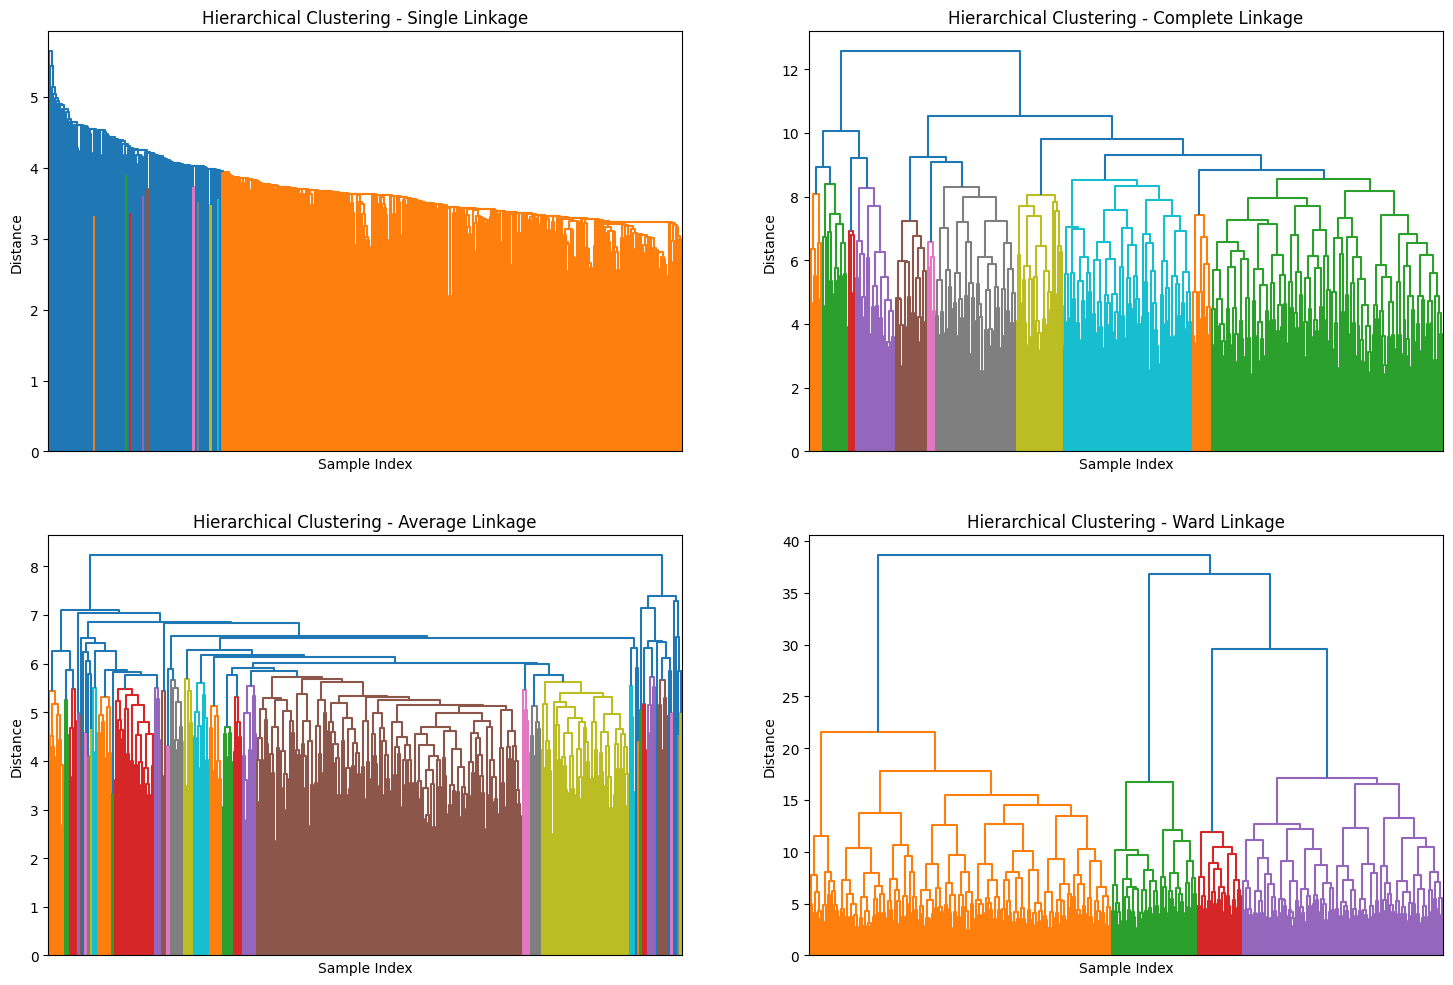

In [114]:
# Perform linkage with different methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    Z = linkage(df_grouping_pca_df, method=method)
    dendrogram(Z, ax=axes[i], no_labels=True)
    axes[i].set_title(f"Hierarchical Clustering - {method.capitalize()} Linkage")
    axes[i].set_xlabel("Sample Index")
    axes[i].set_ylabel("Distance")

### Among the linkage method, Ward's method is the most optimal as it can define groups more clearly and is less sensitive to outliers.

### b. Grouping using Ward's method

In [118]:
# Hierarchical clustering with Ward's method
Z = linkage(df_grouping_pca, method='ward')

# Assign clusters: 4 clusters
clusters = fcluster(Z, t=4, criterion='maxclust')

# Add cluster labels to the original df_lyon DataFrame
df_hierarchical_PCA = df_lyon.copy()
df_hierarchical_PCA['Cluster'] = clusters

df_hierarchical_PCA

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Cluster
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,No,18,3,4,0,6,4,3,5,4,1,3,0.498720,1
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,No,11,3,3,2,5,3,3,4,2,1,3,0.529754,1
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,No,11,3,3,1,1,2,3,1,0,0,0,0.507917,1
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,No,17,3,3,1,25,2,3,1,0,0,0,0.507917,1
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,No,16,3,4,0,16,3,4,13,11,3,7,0.590528,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,No,14,3,1,2,5,2,3,4,3,0,3,0.477493,1
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Yes,13,3,4,1,6,0,3,5,4,1,4,0.484833,1
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Yes,13,3,4,0,5,4,2,3,2,2,2,0.667726,1
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,No,11,3,3,2,13,2,3,5,4,0,4,0.514733,1


### c. Discrimitation check

Average Age by Cluster:
         count       mean       std   min   25%   50%   75%   max
Cluster                                                          
1        180.0  36.805556  9.412400  18.0  31.0  36.0  44.0  59.0
2         51.0  38.058824  8.954131  19.0  32.0  36.0  43.5  58.0
3         31.0  44.967742  6.968902  32.0  41.0  44.0  50.0  60.0
4        124.0  37.967742  7.514685  27.0  31.0  37.0  43.0  60.0

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
1        0.400000  0.600000
2        0.416667  0.583333
3        0.225806  0.774194
4        0.428571  0.571429

Marital Status Distribution by Cluster:
MaritalStatus  Divorced   Married    Single
Cluster                                    
1              0.220096  0.382775  0.397129
2              0.183333  0.500000  0.316667
3              0.290323  0.451613  0.258065
4              0.210145  0.500000  0.289855


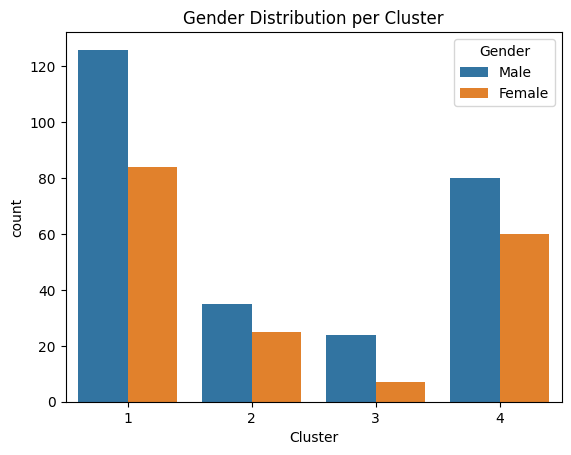

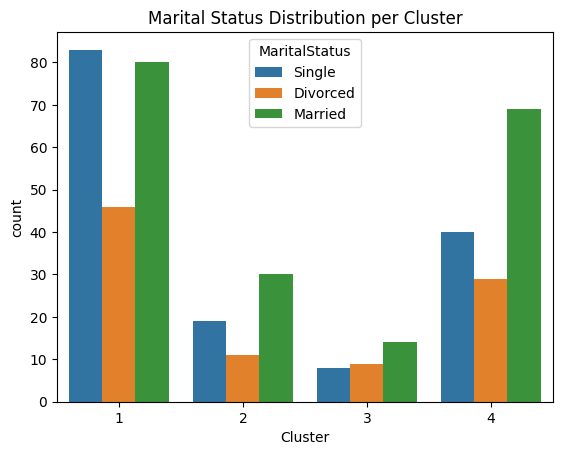

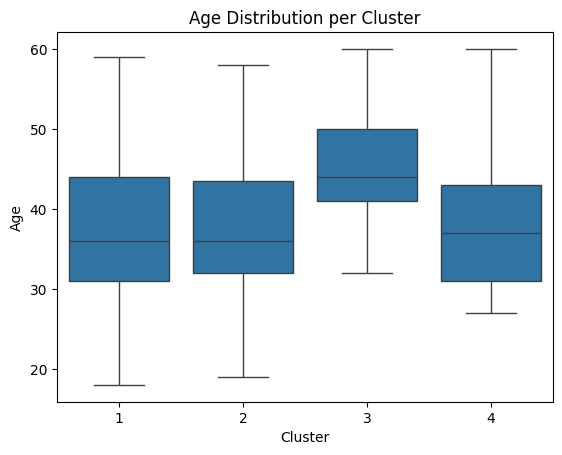

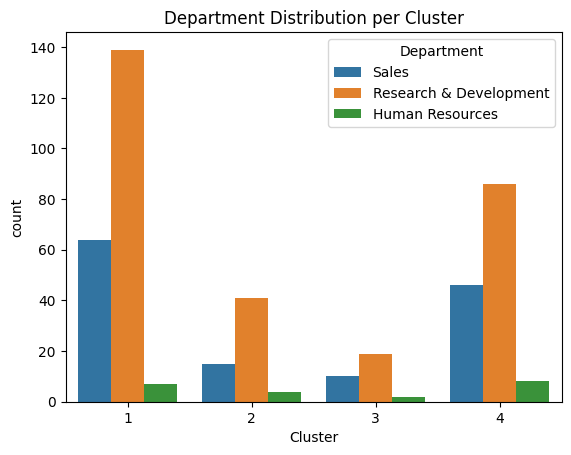

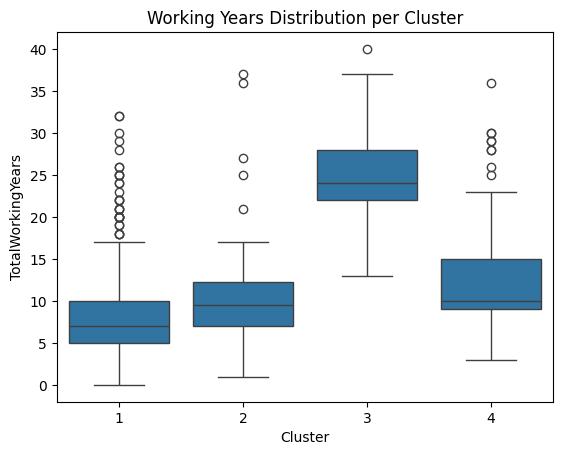

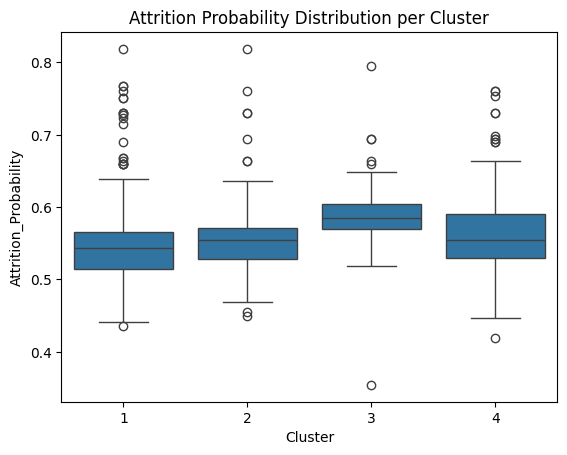

In [119]:
# 1. Check Age Distribution (e.g., mean and distribution per cluster)
print("Average Age by Cluster:")
print(df_hierarchical_PCA.groupby('Cluster')['Age'].describe())

# 2. Check Gender Distribution per Cluster
print("\nGender Distribution by Cluster:")
print(df_hierarchical_PCA.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack())

# 3. Check Marital Status Distribution per Cluster
print("\nMarital Status Distribution by Cluster:")
print(df_hierarchical_PCA.groupby('Cluster')['MaritalStatus'].value_counts(normalize=True).unstack())

# Gender distribution per cluster
sns.countplot(data=df_hierarchical_PCA, x='Cluster', hue='Gender')
plt.title('Gender Distribution per Cluster')
plt.show()

# Marital status distribution per cluster
sns.countplot(data=df_hierarchical_PCA, x='Cluster', hue='MaritalStatus')
plt.title('Marital Status Distribution per Cluster')
plt.show()

# Age boxplot
sns.boxplot(data=df_hierarchical_PCA, x='Cluster', y='Age')
plt.title('Age Distribution per Cluster')
plt.show()

# Department distribution per cluster
sns.countplot(data=df_hierarchical_PCA, x='Cluster', hue='Department')
plt.title('Department Distribution per Cluster')
plt.show()

# Working years distribution per cluster
sns.boxplot(data=df_hierarchical_PCA, x='Cluster', y='TotalWorkingYears')
plt.title('Working Years Distribution per Cluster')
plt.show()

# Probability boxplot
sns.boxplot(data=df_hierarchical_PCA, x='Cluster', y='Attrition_Probability')
plt.title('Attrition Probability Distribution per Cluster')
plt.show()


### d. Prepare data for optimization

In [117]:
# Calculate serverance cost of each cluster
df_hierarchical_PCA["Base_Severance"] = df_hierarchical_PCA.apply(calculate_base_severance, axis=1)

# Group by cluster and calculate total headcount, average attrition probability and salary
cluster_by_hierarchical = df_hierarchical_PCA.groupby('Cluster').agg(
    Total_Employees=("Attrition_Probability", "count"),
    Avg_Attrition_Probability=("Attrition_Probability", "mean"),
    Total_Severance_Cost=("Base_Severance", "sum"),
    Total_Monthly_Income=("MonthlyIncome", "sum")
)

# Count of employees in each department by cluster
department_counts = pd.crosstab(df_hierarchical_PCA["Cluster"], df_hierarchical_PCA["Department"])

# Merge into summary
cluster_by_hierarchical = cluster_by_hierarchical.merge(department_counts, left_index=True, right_index=True)

#cluster_by_hierarchical.to_excel('optimization.xlsx', index=True)

cluster_by_hierarchical

,Total_Employees,Avg_Attrition_Probability,Total_Severance_Cost,Total_Monthly_Income,Human Resources,Research & Development,Sales
Cluster,,,,,,,
1,21,0.596904,2.406028e+05,316287,0,12,9
2,189,0.547976,7.730645e+05,840764,7,127,55
3,60,0.566161,1.041242e+06,365792,4,41,15
4,31,0.591030,3.089319e+06,453477,2,19,10
5,140,0.567936,2.265210e+06,946148,8,86,46


## x. Grouping by hierarchical clustering on original feature space (Sign of discrimination)

### a. Finding the most optimal linkage method

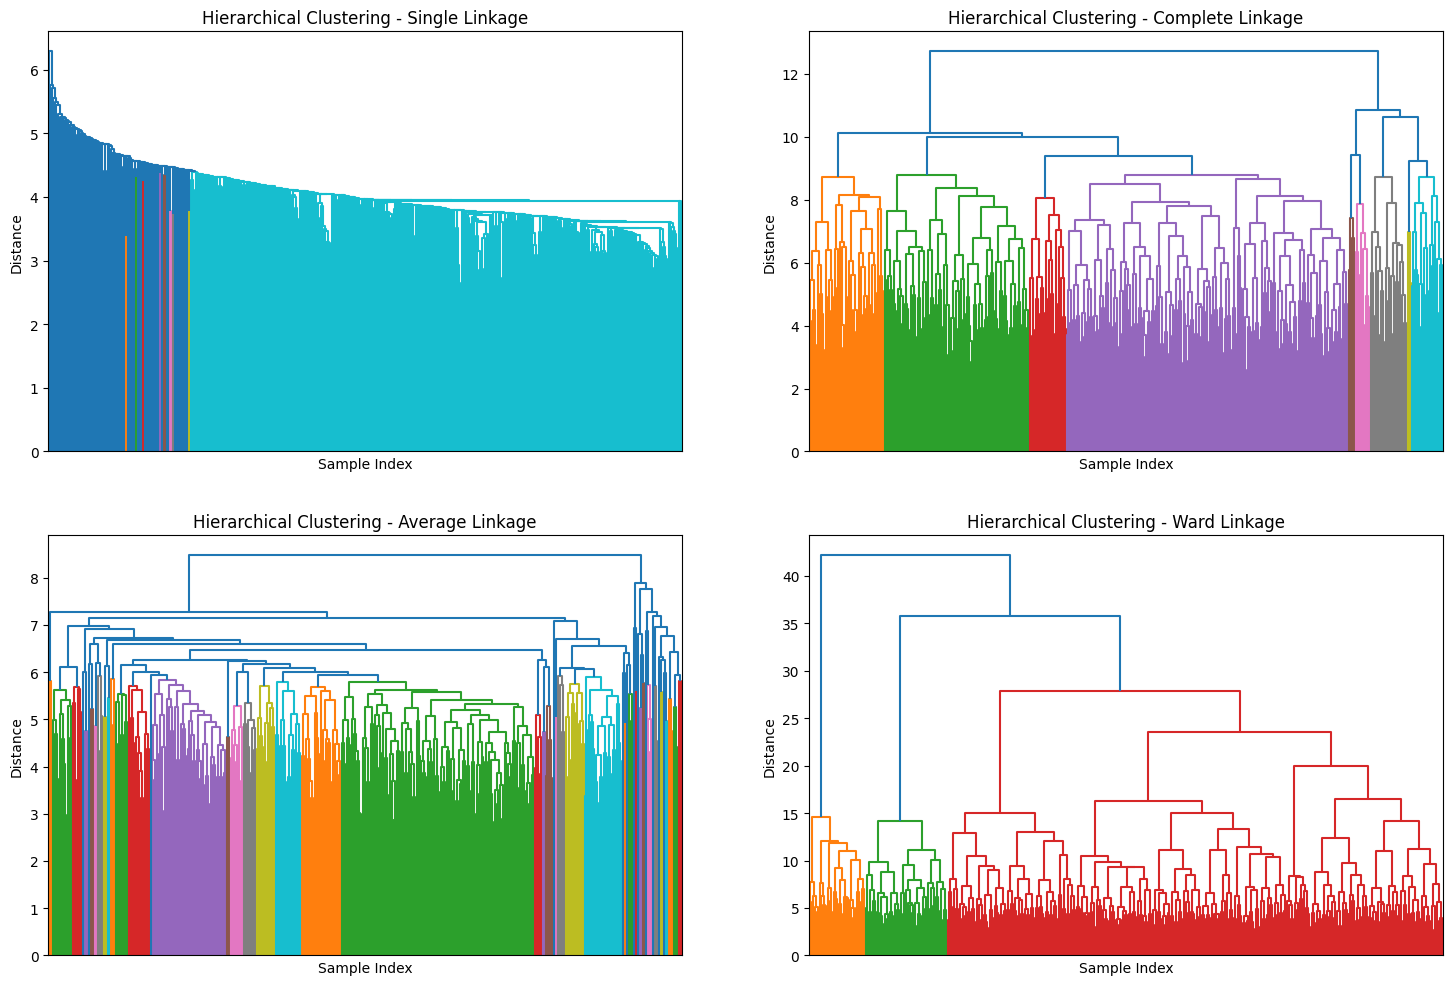

In [ ]:
# Perform linkage with different methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrograms
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, method in enumerate(linkage_methods):
    Z = linkage(df_grouping, method=method)
    dendrogram(Z, ax=axes[i], no_labels=True)
    axes[i].set_title(f"Hierarchical Clustering - {method.capitalize()} Linkage")
    axes[i].set_xlabel("Sample Index")
    axes[i].set_ylabel("Distance")

### b. Grouping using Ward's method

In [ ]:
# Hierarchical clustering with Ward's method
Z = linkage(df_grouping, method='ward')

# Assign clusters: 7 clusters
clusters = fcluster(Z, t=7, criterion='maxclust')

# Add cluster labels to the original df_lyon DataFrame
df_hierarchical = df_lyon.copy()
df_hierarchical['Cluster'] = clusters

df_hierarchical

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Cluster
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,No,18,3,4,0,6,4,3,5,4,1,3,0.498720,4
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,No,11,3,3,2,5,3,3,4,2,1,3,0.529754,4
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,No,11,3,3,1,1,2,3,1,0,0,0,0.507917,4
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,No,17,3,3,1,25,2,3,1,0,0,0,0.507917,6
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,No,16,3,4,0,16,3,4,13,11,3,7,0.590528,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,No,14,3,1,2,5,2,3,4,3,0,3,0.477493,4
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Yes,13,3,4,1,6,0,3,5,4,1,4,0.484833,7
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Yes,13,3,4,0,5,4,2,3,2,2,2,0.667726,4
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,No,11,3,3,2,13,2,3,5,4,0,4,0.514733,6


### c. Discrimination check

Average Age by Cluster:
         count       mean       std   min   25%   50%    75%   max
Cluster                                                           
1         39.0  45.717949  8.201247  29.0  41.0  45.0  51.50  60.0
2         48.0  36.770833  8.622681  19.0  32.0  34.0  42.25  58.0
3         75.0  36.293333  6.349661  27.0  31.0  36.0  39.00  50.0
4        123.0  34.601626  8.934864  18.0  30.0  34.0  39.00  59.0
5         17.0  48.823529  4.720107  42.0  46.0  49.0  53.00  59.0
6         37.0  40.540541  6.946600  27.0  37.0  40.0  46.00  58.0
7         47.0  38.553191  7.920278  24.0  31.5  37.0  44.00  58.0

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
1        0.282051  0.717949
2        0.456140  0.543860
3        0.400000  0.600000
4        0.397260  0.602740
5        0.352941  0.647059
6        0.525000  0.475000
7        0.346154  0.653846

Marital Status Distribution by Cluster:
MaritalStatus  Divorced   Married    Single
Clu

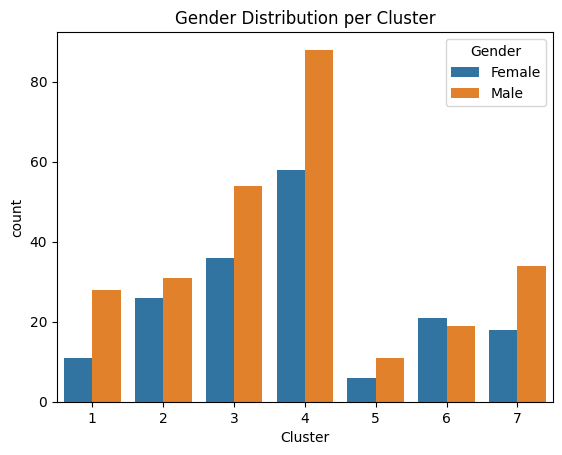

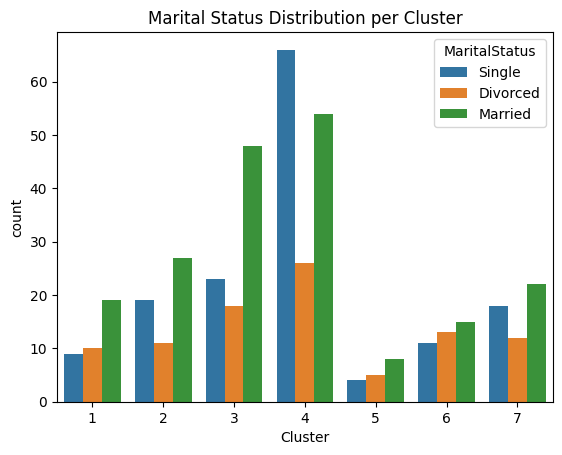

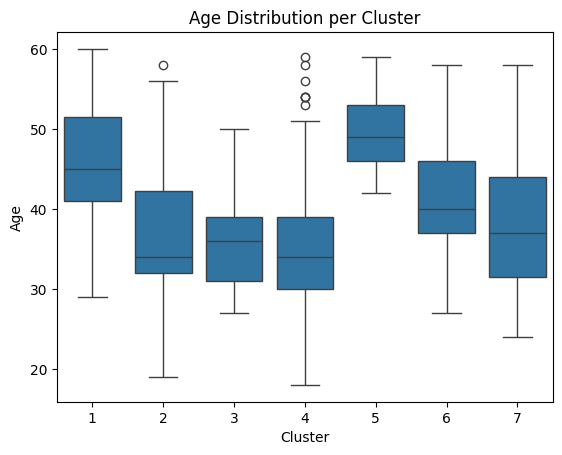

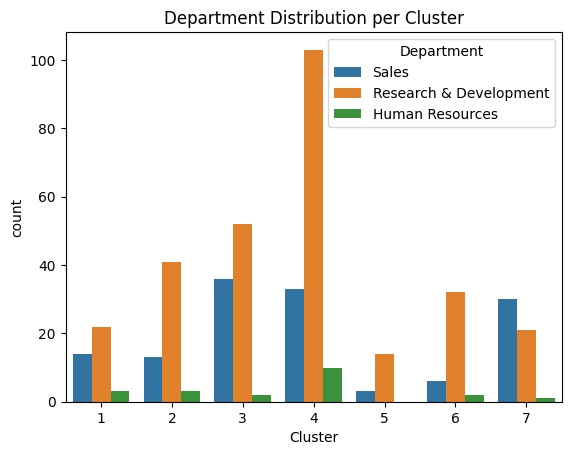

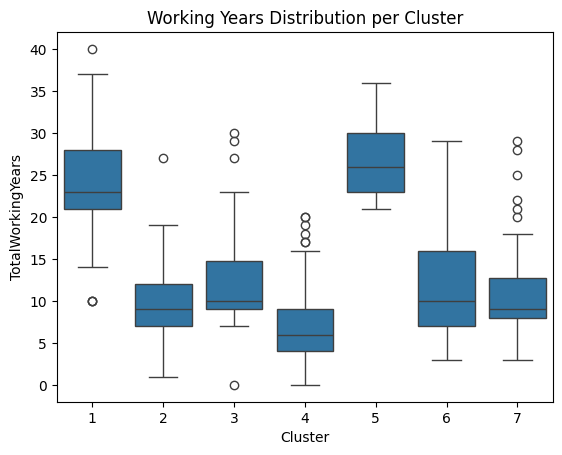

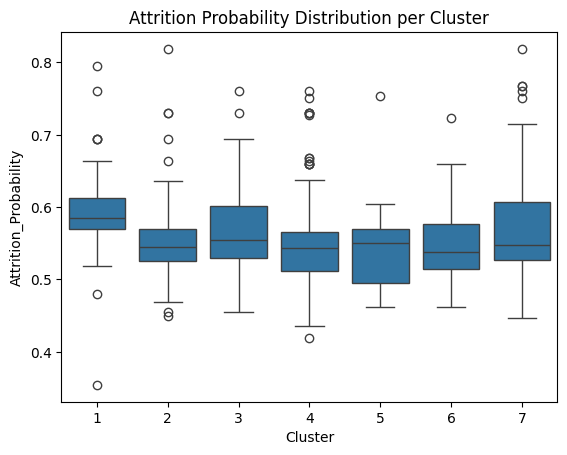

In [ ]:
# 1. Check Age Distribution (e.g., mean and distribution per cluster)
print("Average Age by Cluster:")
print(df_hierarchical.groupby('Cluster')['Age'].describe())

# 2. Check Gender Distribution per Cluster
print("\nGender Distribution by Cluster:")
print(df_hierarchical.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack())

# 3. Check Marital Status Distribution per Cluster
print("\nMarital Status Distribution by Cluster:")
print(df_hierarchical.groupby('Cluster')['MaritalStatus'].value_counts(normalize=True).unstack())

# Gender distribution per cluster
sns.countplot(data=df_hierarchical, x='Cluster', hue='Gender')
plt.title('Gender Distribution per Cluster')
plt.show()

# Marital status distribution per cluster
sns.countplot(data=df_hierarchical, x='Cluster', hue='MaritalStatus')
plt.title('Marital Status Distribution per Cluster')
plt.show()

# Age boxplot
sns.boxplot(data=df_hierarchical, x='Cluster', y='Age')
plt.title('Age Distribution per Cluster')
plt.show()

# Department distribution per cluster
sns.countplot(data=df_hierarchical, x='Cluster', hue='Department')
plt.title('Department Distribution per Cluster')
plt.show()

# Working years distribution per cluster
sns.boxplot(data=df_hierarchical, x='Cluster', y='TotalWorkingYears')
plt.title('Working Years Distribution per Cluster')
plt.show()

# Probability boxplot
sns.boxplot(data=df_hierarchical, x='Cluster', y='Attrition_Probability')
plt.title('Attrition Probability Distribution per Cluster')
plt.show()


## x. Grouping by important features space (Higher Severance Cost)

### a. Data Preprocessing

(array([278.,  44.,  39.,  14.,  31.,   2.,   7.,   8.,   6.,  12.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

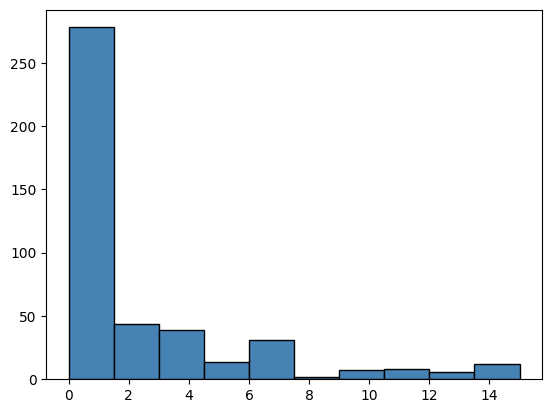

In [37]:
#plt.hist(df_lyon['RelationshipSatisfaction'], color='steelblue', edgecolor='black')
#plt.hist(df_lyon['RelationshipSatisfaction'], color='steelblue', edgecolor='black')
#plt.hist(df_lyon['YearsWithCurrManager'], color='steelblue', edgecolor='black')
#plt.hist(df_lyon['WorkLifeBalance'], color='steelblue', edgecolor='black')
#plt.hist(df_lyon['EnvironmentSatisfaction'], color='steelblue', edgecolor='black')
plt.hist(df_lyon['YearsSinceLastPromotion'], color='steelblue', edgecolor='black')

In [129]:
df_lyon_cluster = df_lyon.copy()

# Create binary indicators
df_lyon_cluster['Flag_HighRelSat'] = (df_lyon_cluster['RelationshipSatisfaction'] >= 3).astype(int)
df_lyon_cluster['Flag_LowStockOption'] = (df_lyon_cluster['StockOptionLevel'] <= 1).astype(int)
df_lyon_cluster['Flag_OverTime'] = (df_lyon_cluster['OverTime'] == 'Yes').astype(int)
df_lyon_cluster['Flag_LowManagerYears'] = (df_lyon_cluster['YearsWithCurrManager'] <= 5).astype(int)
df_lyon_cluster['Flag_LowWorkLife'] = (df_lyon_cluster['WorkLifeBalance'] <= 3).astype(int)
df_lyon_cluster['Flag_LowEnvSat'] = (df_lyon_cluster['EnvironmentSatisfaction'] <= 3).astype(int)

# Select only flag columns
flag_cols = [col for col in df_lyon_cluster.columns if col.startswith('Flag_')]

### b. Apply Clustering

In [133]:
# Apply clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_lyon_cluster['Clusters'] = kmeans.fit_predict(df_lyon_cluster[flag_cols])

df_lyon_cluster

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Probability,Flag_HighRelSat,Flag_LowStockOption,Flag_OverTime,Flag_LowManagerYears,Flag_LowWorkLife,Flag_LowEnvSat,Clusters,Base_Severance
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,No,18,3,4,0,6,4,3,5,4,1,3,0.498720,1,1,0,1,1,0,4,10578.75
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,No,11,3,3,2,5,3,3,4,2,1,3,0.529754,1,0,0,1,1,0,4,4450.00
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,No,11,3,3,1,1,2,3,1,0,0,0,0.507917,1,1,0,1,1,0,4,388.75
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,No,17,3,3,1,25,2,3,1,0,0,0,0.507917,1,1,0,1,1,1,3,2431.00
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,No,16,3,4,0,16,3,4,13,11,3,7,0.590528,1,1,0,0,0,0,4,20699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,4,Male,54,3,2,Sales Executive,1,Married,4373,17456,0,No,14,3,1,2,5,2,3,4,3,0,3,0.477493,0,0,0,1,1,0,4,4373.00
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,3,Male,73,3,2,Sales Executive,2,Married,6349,22107,0,Yes,13,3,4,1,6,0,3,5,4,1,4,0.484833,1,1,1,1,1,1,0,7936.25
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,Male,84,1,1,Research Scientist,4,Married,3464,24737,5,Yes,13,3,4,0,5,4,2,3,2,2,2,0.667726,1,1,1,1,1,1,0,2598.00
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,No,11,3,3,2,13,2,3,5,4,0,4,0.514733,1,0,0,1,1,0,4,6505.00


### c. Discrimination check

Average Age by Cluster:
          count       mean       std   min   25%   50%   75%   max
Clusters                                                          
0          90.0  36.866667  8.798876  19.0  31.0  36.0  43.5  59.0
1         115.0  38.973913  8.169757  27.0  33.0  38.0  44.0  60.0
2          37.0  42.351351  8.838729  24.0  37.0  42.0  49.0  58.0
3          69.0  36.115942  9.777730  18.0  31.0  36.0  44.0  59.0
4          75.0  37.453333  8.241774  21.0  32.0  36.0  43.5  58.0

Gender Distribution by Cluster:
Gender      Female      Male
Clusters                    
0         0.439252  0.560748
1         0.398438  0.601562
2         0.375000  0.625000
3         0.455696  0.544304
4         0.310345  0.689655

Marital Status Distribution by Cluster:
MaritalStatus  Divorced   Married    Single
Clusters                                   
0              0.261682  0.411215  0.327103
1              0.206349  0.484127  0.309524
2              0.275000  0.475000  0.250000
3         

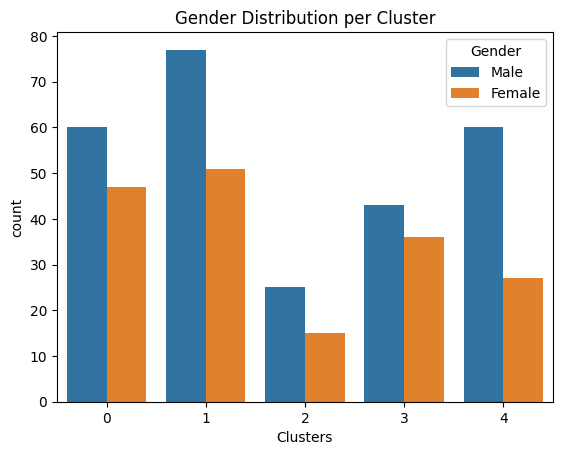

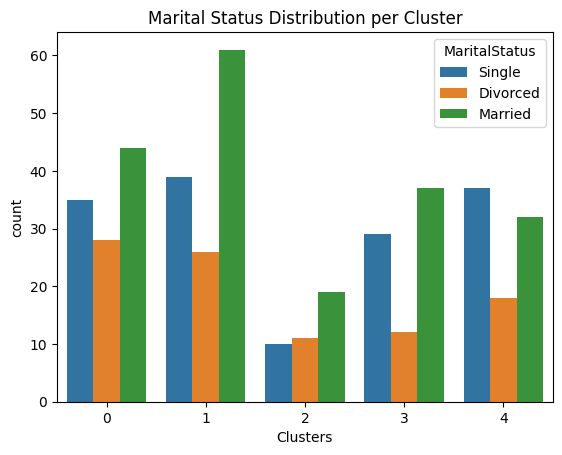

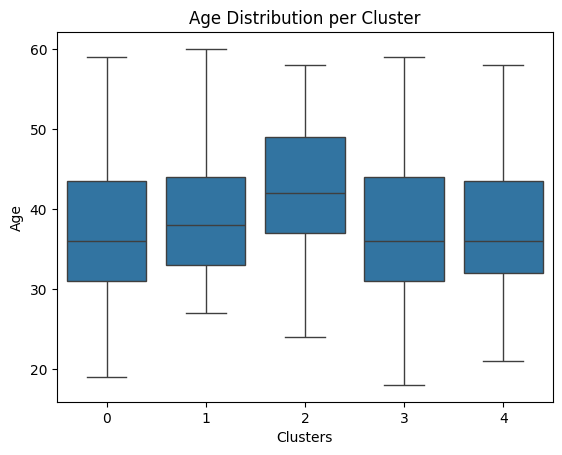

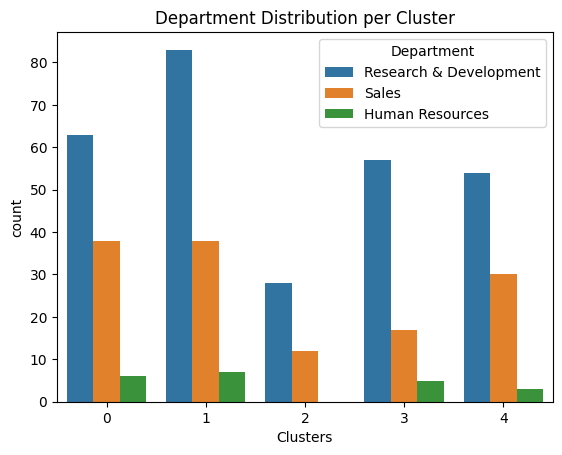

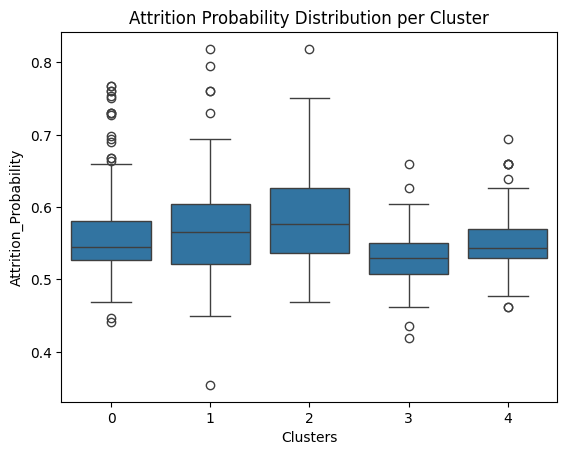

In [134]:
# 1. Check Age Distribution (e.g., mean and distribution per cluster)
print("Average Age by Cluster:")
print(df_lyon_cluster.groupby('Clusters')['Age'].describe())

# 2. Check Gender Distribution per Cluster
print("\nGender Distribution by Cluster:")
print(df_lyon_cluster.groupby('Clusters')['Gender'].value_counts(normalize=True).unstack())

# 3. Check Marital Status Distribution per Cluster
print("\nMarital Status Distribution by Cluster:")
print(df_lyon_cluster.groupby('Clusters')['MaritalStatus'].value_counts(normalize=True).unstack())

# Gender distribution per cluster
sns.countplot(data=df_lyon_cluster, x='Clusters', hue='Gender')
plt.title('Gender Distribution per Cluster')
plt.show()

# Marital status distribution per cluster
sns.countplot(data=df_lyon_cluster, x='Clusters', hue='MaritalStatus')
plt.title('Marital Status Distribution per Cluster')
plt.show()

# Age boxplot
sns.boxplot(data=df_lyon_cluster, x='Clusters', y='Age')
plt.title('Age Distribution per Cluster')
plt.show()


# Department distribution per cluster
sns.countplot(data=df_lyon_cluster, x='Clusters', hue='Department')
plt.title('Department Distribution per Cluster')
plt.show()

# Probability boxplot
sns.boxplot(data=df_lyon_cluster, x='Clusters', y='Attrition_Probability')
plt.title('Attrition Probability Distribution per Cluster')
plt.show()


### d. Prepare data for optimization

In [132]:
# Calculate serverance cost of each cluster
df_lyon_cluster["Base_Severance"] = df_lyon_cluster.apply(calculate_base_severance, axis=1)

# Group by cluster and calculate total headcount, average attrition probability and salary
clusters_by_features = df_lyon_cluster.groupby('Clusters').agg(
    Total_Employees=("Attrition_Probability", "count"),
    Avg_Attrition_Probability=("Attrition_Probability", "mean"),
    Total_Severance_Cost=("Base_Severance", "sum"),
    Total_Monthly_Income=("MonthlyIncome", "sum")
)

# Count of employees in each department by cluster
department_counts = pd.crosstab(df_lyon_cluster["Clusters"], df_lyon_cluster["Department"])

# Merge into summary
clusters_by_features = clusters_by_features.merge(department_counts, left_index=True, right_index=True)
clusters_by_features.to_excel('optimization_features.xlsx', index=True)

clusters_by_features

,Total_Employees,Avg_Attrition_Probability,Total_Severance_Cost,Total_Monthly_Income,Human Resources,Research & Development,Sales
Clusters,,,,,,,
0,107,0.571329,8.906098e+05,620856,6,63,38
1,128,0.570775,4.394908e+06,1058858,7,83,38
2,40,0.595584,7.161277e+05,295694,0,28,12
3,79,0.531974,5.084326e+05,443086,5,57,17
4,87,0.550164,8.993598e+05,503974,3,54,30
